# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [7]:
import json

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [10]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

# Submit request and format output
btc_data = requests.get(btc_url).json()
eth_data = requests.get(eth_url).json()


print(json.dumps(btc_data, indent=4))
print(json.dumps(eth_data, indent=4))

# Select fact
btc_data
eth_data

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19174268,
            "total_supply": 19174268,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 19524.64,
                    "volume_24h": 13484783901,
                    "market_cap": 374370666852,
                    "percentage_change_1h": 0.134550830588463,
                    "percentage_change_24h": 0.155806615561897,
                    "percentage_change_7d": 1.08817662635294,
                    "percent_change_1h": 0.134550830588463,
                    "percent_change_24h": 0.155806615561897,
                    "percent_change_7d": 1.08817662635294
                }
            },
            "last_updated": 1665327756
        }
    },
    "metadata": {
        "timestamp": 1665327756,
        "num_cryp

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 120878733,
   'total_supply': 120878733,
   'max_supply': 120878733,
   'quotes': {'USD': {'price': 1326.1,
     'volume_24h': 4776122409,
     'market_cap': 160296987786,
     'percentage_change_1h': 0.120906376866519,
     'percentage_change_24h': 0.121062641716738,
     'percentage_change_7d': 1.13129046247039,
     'percent_change_1h': 0.120906376866519,
     'percent_change_24h': 0.121062641716738,
     'percent_change_7d': 1.13129046247039}},
   'last_updated': 1665327756}},
 'metadata': {'timestamp': 1665327756,
  'num_cryptocurrencies': 3116,
  'error': None}}

In [58]:
# Fetch current BTC price
btc_rate = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_rate = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_rate
my_eth_value = my_eth * eth_rate

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $23429.57
The current value of your 5.3 ETH is $7028.33


The current value of your 1.2 BTC is $23429.57
The current value of your 5.3 ETH is $7028.33

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [111]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [112]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [113]:
# Set AGG ticker
ticker = 'AGG'

# Format current date as ISO format
today = pd.Timestamp("2022-10-07", tz="America/New_York").isoformat()

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for AGG
df_agg = alpaca.get_bars(
    ticker,
    timeframe,
    start=today,
    end=today
).df

df_agg.rename(columns = {'close': 'AGG'}, inplace=True)



# Set SPY ticker
ticker = 'SPY'

# Format current date as ISO format
today = pd.Timestamp("2022-10-07", tz="America/New_York").isoformat()

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY
df_spy = alpaca.get_bars(
    ticker,
    timeframe,
    start=today,
    end=today
).df

df_spy.rename(columns = {'close': 'SPY'}, inplace=True)

# Concatenate the ticker DataFrames for AGG and SPY
df_ticker = pd.concat([df_agg['AGG'], df_spy['SPY']], axis=1)

# Display Dataframe
df_ticker.head()

,AGG,SPY
timestamp,,
2022-10-07 04:00:00+00:00,95.77,362.79


In [114]:
# Pick AGG and SPY close prices
agg_close_price = df_ticker['AGG']
spy_close_price = df_ticker['SPY']


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $timestamp
2022-10-07 04:00:00+00:00    95.77
Name: AGG, dtype: float64
Current SPY closing price: $timestamp
2022-10-07 04:00:00+00:00    362.79
Name: SPY, dtype: float64


In [116]:
# Compute the current value of shares
my_agg_value = int(my_agg) * float(agg_close_price)
my_spy_value = int(my_spy) * float(spy_close_price)
my_agg_value
my_spy_value

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18139.50
The current value of your 200 AGG shares is $19154.00


The current value of your 50 SPY shares is $18139.50
The current value of your 200 AGG shares is $19154.00

### Savings Health Analysis

In [118]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = 0
crypto += my_btc_value
crypto += my_eth_value

shares = 0
shares += my_agg_value
shares += my_eth_value
# Create savings DataFrame
data = {'amount':[crypto, shares]}
df_savings = pd.DataFrame(data, index= ['crypto', 'shares'])
# Display savings DataFrame
display(df_savings)

,amount
crypto,30457.898
shares,26182.330


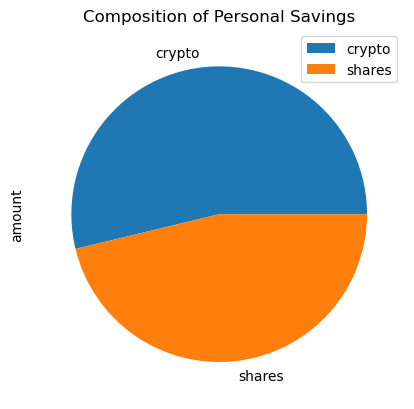

In [125]:
# Plot savings pie chart
plot = df_savings.plot(kind='pie',title = 'Composition of Personal Savings', y='amount')

In [126]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = 0
total_savings += crypto
total_savings += shares

# Validate saving health
if total_savings > emergency_fund:
    print("congratulation you have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("congratulation for having reaching your financial goal.")
else:
    print(f"Almost There! ")

congratulation you have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [127]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [129]:
# Get 5 years' worth of historical data for SPY and AGG
# Set timeframe to "1Day"
timeframe = "1Day"


# Set the ticker information
tickers = ["AGG","SPY"]

# Get 5 year's worth of historical price data for AGG and SPY
df_5_year = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Reorganize the DataFrame
# Separate ticker data
AGG = df_5_year[df_5_year['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_5_year[df_5_year['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_5_year = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])


# Display sample data
df_5_year.head(10)

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   
2016-05-09 04:00:00+00:00  111.11  111.1400  111.0050  111.04  2173463   
2016-05-10 04:00:00+00:00  111.06  111.1000  110.9900  111.09  2103822   
2016-05-11 04:00:00+00:00  111.06  111.2600  111.0200  111.09  2507055   
2016-05-12 04:00:00+00:00  110.92  111.1000  110.9200  110.99  1938846   
2016-05-13 04:00:00+00:00  111.08  111.2300  111.0300  111.20  1511386   

                                                      SPY                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.1800  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.8000  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.8500  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.9800  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.7700  203.88   
2016-05-09 04:00:00+00:00       12416  111.070531  205.58  206.4000  205.36   
2016-05-10 04:00:00+00:00       10989  111.042210  206.64  208.5000  206.64   
2016-05-11 04:00:00+00:00        9310  111.139311  207.89  208.5400  206.50   
2016-05-12 04:00:00+00:00        8182  111.018576  207.29  207.4899  205.37   
2016-05-13 04:00:00+00:00        9321  111.155567  206.23  206.8600  204.38   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074  
2016-05-09 04:00:00+00:00  205.89   74374922      263989  205.884750  
2016-05-10 04:00:00+00:00  208.46   77472207      267366  207.804326  
2016-05-11 04:00:00+00:00  206.50   81726989      295512  207.408406  
2016-05-12 04:00:00+00:00  206.55   89586108      344294  206.451838  
2016-05-13 04:00:00+00:00  204.72   96474527      359281  205.579209

In [136]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Set number of simulations
num_sims = 500

MC_agg_spy = MCSimulation(
    portfolio_data= df_5_year,
    num_simulation = num_sims,
    weights= [.40, .60],
    num_trading_days = 252 * 30
)

In [137]:
# Print the simulation input data
MC_agg_spy.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [138]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_agg_spy.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/alphathiaw/Rutgers/Rutgers Class/API---HOMEWORK/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993855,0.994364,1.004157,1.004863,0.992571,0.997794,1.003405,1.021355,1.002856,0.998535,...,1.003615,0.985951,0.993587,1.000280,0.989723,1.007367,1.006065,0.993536,1.000999,0.991483
2,0.992380,0.983085,1.017187,1.001631,0.990356,0.989640,1.004072,1.015533,1.005590,1.007292,...,1.006308,0.990801,0.998923,1.002841,0.994472,1.017279,1.006330,1.001698,0.991260,0.985776
3,1.008449,1.000397,1.014031,1.007809,0.978060,0.994431,1.004696,1.014292,0.999086,1.005900,...,0.998827,0.996409,0.990385,1.000783,0.991627,1.019681,1.009668,0.990116,0.986415,0.993961
4,1.009018,0.993137,1.034757,1.010872,0.969671,1.008101,0.992284,1.027394,1.001123,0.997856,...,1.002823,0.987048,0.992884,1.013672,0.983576,1.022079,1.016377,0.993021,0.986045,1.002831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.993122,13.967925,16.516166,30.181794,14.531729,4.928284,16.477220,13.200433,17.442467,28.358475,...,10.048035,8.061449,18.818180,17.327778,17.748240,8.769435,19.258059,5.553495,6.566578,8.987311
7557,10.042656,13.999371,16.575174,30.104463,14.559022,4.945414,16.594960,13.124767,17.192263,28.247941,...,10.043365,8.069787,18.781168,17.303541,17.613592,8.823630,19.061061,5.575761,6.498283,8.816572
7558,10.005100,13.996870,16.608517,30.169799,14.875389,4.942455,16.506531,13.098268,17.011762,28.510252,...,9.901767,8.100038,18.851347,17.318055,17.512568,8.851948,19.110950,5.574828,6.478752,8.921964
7559,9.929472,13.814428,16.764252,30.361217,14.858131,4.922524,16.624125,12.941349,17.400136,28.782767,...,9.903722,8.118818,18.794357,17.250297,17.364246,8.893655,19.152045,5.589220,6.502324,8.878154


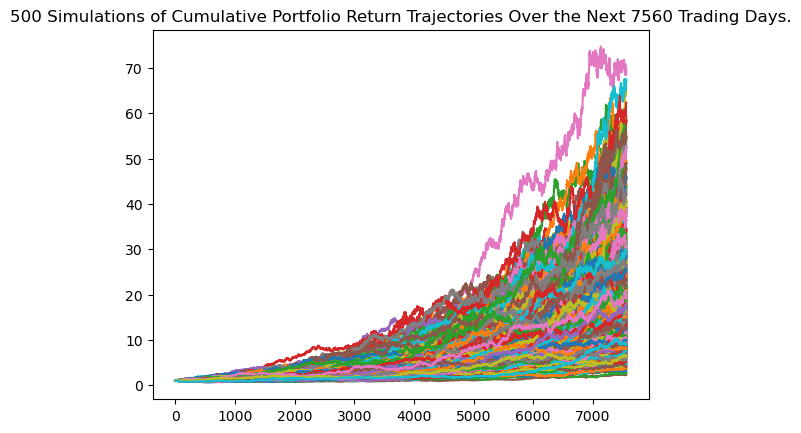

In [139]:
# Plot simulation outcomes
line_plot = MC_agg_spy.plot_simulation()

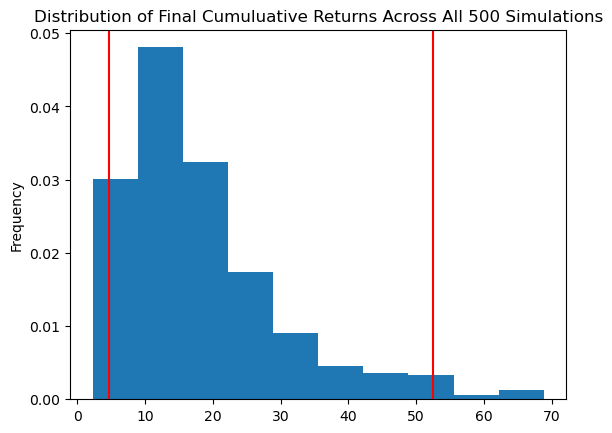

In [140]:
# Plot probability distribution and confidence intervals
dist_plot = MC_agg_spy.plot_distribution()

### Retirement Analysis

In [141]:
# Fetch summary statistics from the Monte Carlo simulation results
agg_spy_stat = MC_agg_spy.summarize_cumulative_return()

# Print summary statistics
print(agg_spy_stat)

count           500.000000
mean             18.188929
std              11.775290
min               2.272744
25%               9.948444
50%              15.082379
75%              22.905443
max              68.840277
95% CI Lower      4.612707
95% CI Upper     52.549758
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [143]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(agg_spy_stat[8]*20000,2)
ci_upper = round(agg_spy_stat[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $92254.14 and $1050995.16


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [144]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(agg_spy_stat[8]*initial_investment,2)
ci_upper = round(agg_spy_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $138381.21 and $1576492.74


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [162]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_agg_spy_5 = MCSimulation(
    portfolio_data= df_5_year,
    num_simulation = num_sims,
    weights= [.60, .40],
    num_trading_days = 252 * 5
)

In [163]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_agg_spy_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/alphathiaw/Rutgers/Rutgers Class/API---HOMEWORK/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993641,1.014657,0.998308,1.008110,1.004035,1.002307,1.004504,1.003986,1.003651,1.013434,...,0.996514,1.004021,1.009717,0.995661,1.003169,1.000402,0.993480,1.004421,1.003695,1.000104
2,1.004284,1.015809,0.998406,1.006005,1.007704,1.002823,1.005530,1.002049,1.009486,1.011576,...,0.997428,1.005324,1.019285,0.997879,1.009602,1.007504,0.997908,1.005085,0.996768,0.987308
3,1.015396,1.014888,1.000753,1.010677,1.007420,0.999672,1.010193,1.002786,1.004797,1.018224,...,0.994361,1.012267,1.032935,0.997725,1.012449,1.005700,0.996788,1.013954,0.989978,0.980774
4,1.015250,1.019384,1.006235,1.016257,1.009131,0.995182,1.011253,1.013805,0.997812,1.024064,...,0.995850,1.020173,1.038502,1.000171,1.022409,0.998619,0.998628,1.021642,0.992607,0.989603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.635500,1.273490,1.687264,1.512641,1.112193,1.523724,1.371401,1.401214,1.146984,1.536832,...,1.481012,1.502094,1.677394,1.319247,1.725241,1.340679,1.633963,1.543416,1.399421,1.382267
1257,1.633292,1.278129,1.684921,1.527392,1.108468,1.538379,1.356921,1.404618,1.153061,1.528410,...,1.473163,1.506704,1.676615,1.322737,1.723582,1.337970,1.623961,1.551162,1.407834,1.382829
1258,1.632152,1.279873,1.701742,1.530165,1.122629,1.527014,1.350252,1.412423,1.154521,1.516930,...,1.473216,1.513880,1.680836,1.328397,1.719840,1.343075,1.619337,1.546221,1.401585,1.387379
1259,1.631779,1.270683,1.700248,1.529627,1.108065,1.541943,1.352416,1.410228,1.153382,1.514315,...,1.478480,1.514162,1.685081,1.330872,1.728345,1.349612,1.627843,1.536128,1.408284,1.384380


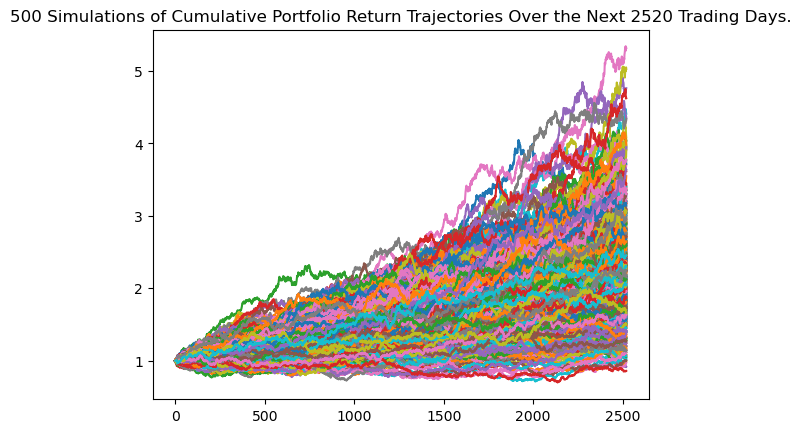

In [164]:
# 5 years Plot simulation outcomes
line_plot_5 = MC_agg_spy.plot_simulation()

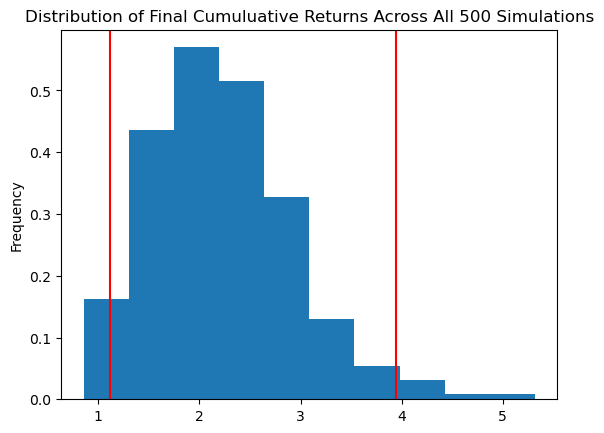

In [165]:
# 5 years Plot probability distribution and confidence intervals
dist_plot_5 = MC_agg_spy.plot_distribution()

In [173]:
# Fetch 5 years summary statistics from the Monte Carlo simulation results
agg_spy_stat_5 = MC_agg_spy_5.summarize_cumulative_return()

# Print summary statistics
print(agg_spy_stat_5)

count           500.000000
mean              1.404916
std               0.254594
min               0.789651
25%               1.233762
50%               1.384839
75%               1.543961
max               2.414814
95% CI Lower      0.973588
95% CI Upper      1.952470
Name: 1260, dtype: float64


In [174]:
# Set initial investment
initial_investment_5 = 25000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(agg_spy_stat_5[8]*initial_investment_5,2)
ci_upper_five = round(agg_spy_stat_5[9]*initial_investment_5,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $25000 in the portfolio over the next 5 years will end within in the range of $24339.69 and $48811.76


### Ten Years Retirement Option

In [168]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_agg_spy_10 = MCSimulation(
    portfolio_data= df_5_year,
    num_simulation = num_sims,
    weights= [.50, .50],
    num_trading_days = 252 * 10
)

In [169]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_agg_spy_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/alphathiaw/Rutgers/Rutgers Class/API---HOMEWORK/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007151,1.001509,0.994981,0.999811,1.008116,1.001171,1.010803,0.996315,1.001718,1.000699,...,1.009382,1.008601,0.998684,1.009531,0.998362,1.000418,0.992141,1.001445,0.993855,1.013433
2,1.004489,0.997905,1.000434,0.990207,1.002028,1.007851,1.014315,1.001911,1.002197,0.998713,...,1.013144,1.012739,0.999877,1.015348,0.999624,1.000779,0.993049,0.991446,1.000325,1.016568
3,0.998336,1.002791,0.999445,0.988278,0.994094,1.016177,1.010135,0.995527,1.001894,1.008940,...,1.013130,1.010508,1.004511,1.008336,0.992880,1.006507,0.984718,0.998957,0.993581,1.021363
4,0.998484,1.005923,1.006942,0.983976,0.993908,1.018223,1.003274,1.004321,1.011002,1.012856,...,1.008398,1.000335,0.996858,1.012630,0.988689,1.017620,0.982654,1.015393,0.994216,1.022767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.411353,2.234069,3.505565,2.227928,1.046476,2.543495,2.609133,3.960485,2.719686,2.639726,...,1.759117,2.553791,3.571332,2.499521,2.028176,1.600742,1.559464,1.709911,2.668513,3.761073
2517,1.419241,2.205147,3.516382,2.223226,1.036769,2.532352,2.617187,3.950970,2.730187,2.652088,...,1.740411,2.553917,3.534865,2.517476,2.013066,1.588635,1.552493,1.706755,2.677083,3.802770
2518,1.416016,2.208420,3.513959,2.242501,1.050930,2.563974,2.617965,3.964741,2.716656,2.636499,...,1.767142,2.566196,3.537572,2.513149,2.009178,1.576143,1.555164,1.705514,2.708743,3.794700
2519,1.409460,2.225952,3.539136,2.242256,1.059604,2.570659,2.622559,3.957517,2.739215,2.646705,...,1.784140,2.564876,3.550211,2.532057,2.003167,1.584005,1.540442,1.706844,2.710504,3.770317


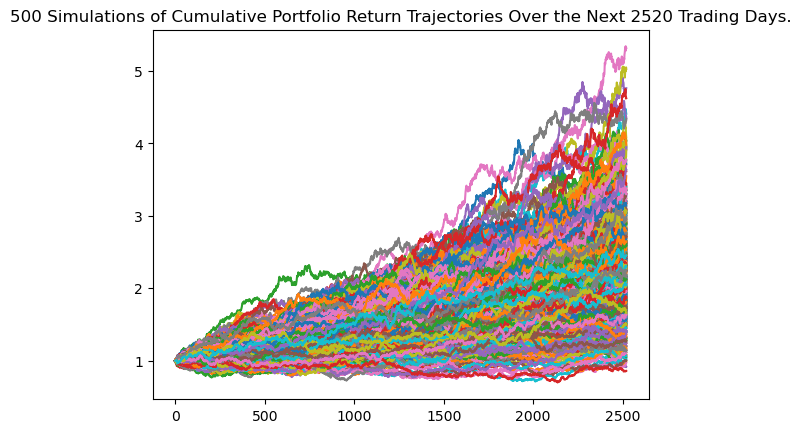

In [170]:
# Plot 10 years simulation outcomes
line_plot_10 = MC_agg_spy.plot_simulation()

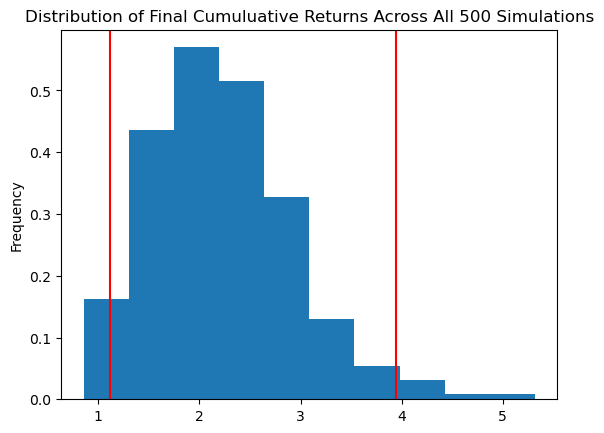

In [171]:
# Plot 10 years probability distribution and confidence intervals
dist_plot_10 = MC_agg_spy.plot_distribution()

In [176]:
# Fetch summary statistics from the Monte Carlo simulation results
agg_spy_stat_10 = MC_agg_spy_10.summarize_cumulative_return()

# Print summary statistics
agg_spy_stat_10

count           500.000000
mean              2.271897
std               0.696597
min               0.742466
25%               1.773446
50%               2.200859
75%               2.655675
max               5.287461
95% CI Lower      1.149501
95% CI Upper      3.976575
Name: 2520, dtype: float64

In [177]:
# Set initial investment
initial_investment_10 = 25000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(agg_spy_stat_10[8]*initial_investment_10,2)
ci_upper_ten = round(agg_spy_stat_10[9]*initial_investment_10,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $25000 in the portfolio over the next 10 years will end within in the range of $28737.53 and $99414.36


There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years with 40% bond and 60% stock  will end within in the range of $92254.14 and $1050995.16


There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years with 40% bond and 60% stock will end within in the range of $138381.21 and $1576492.74


There is a 95% chance that an initial investment of $25000 in the portfolio over the next 5 years with 60% bond and 40% stock will end within in the range of $24339.69 and $48811.76


There is a 95% chance that an initial investment of $25000 in the portfolio over the next 10 years with 50% bond and 50% stock will end within in the range of $28737.53 and $99414.36


Considering different factors in personal clients financial situation, Local Credit Union offers several investment planning options more suited for client. 

Based off The Monte Carlo Stimulation above, basic logic is a higher investment for a longer period has a 95% chance of a much greater return average with less risk while a lesser investment for a shorter period is less rewarding but still contains a pretty good return percentage which at worst will return initial investment around same value of a normal inflation rate growth. 

